In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [6]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

        self.weights_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)
    
    def activate(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid(x)
        elif self.activation == 'relu':
            return self.relu(x)

    def activate_derivative(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid_derivative(x)
        elif self.activation == 'relu':
            return self.relu_derivative(x)
    
    def feedforward(self, X):
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.activate(self.hidden_activation)

        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate=0.1):
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.activate_derivative(self.hidden_output)

        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

        self.weights_history.append(self.weights_input_hidden.copy())

    def train(self, X, y, epochs, learning_rate = 0.1):
        err_arr = []
        iter_arr = []
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - output))
            err_arr.append(loss)
            iter_arr.append(epoch)
        return iter_arr, err_arr, self.weights_history

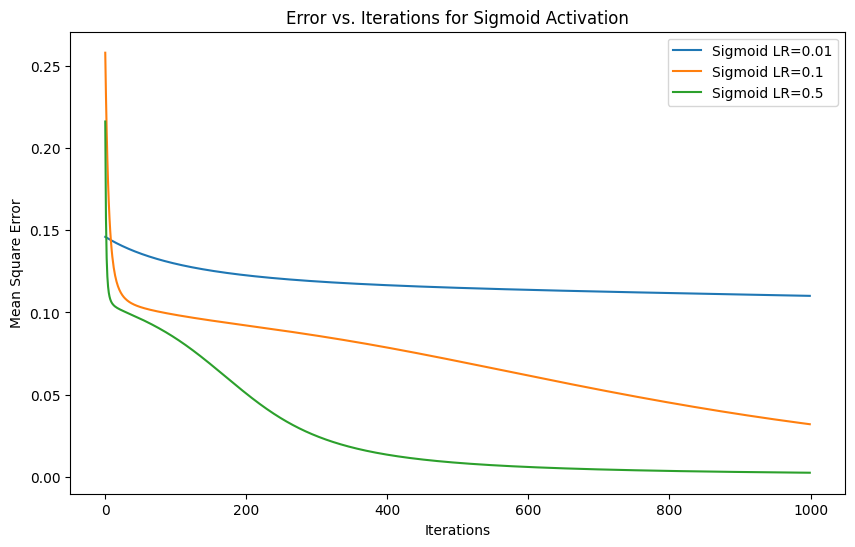

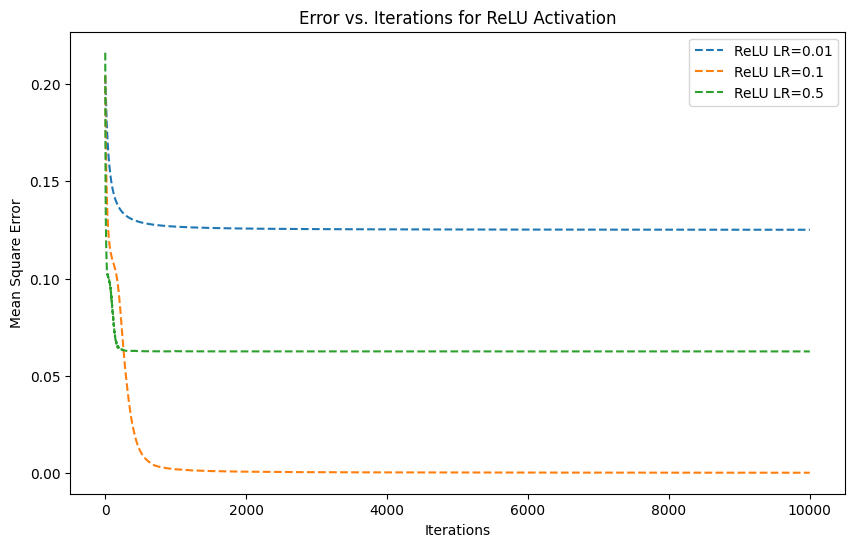

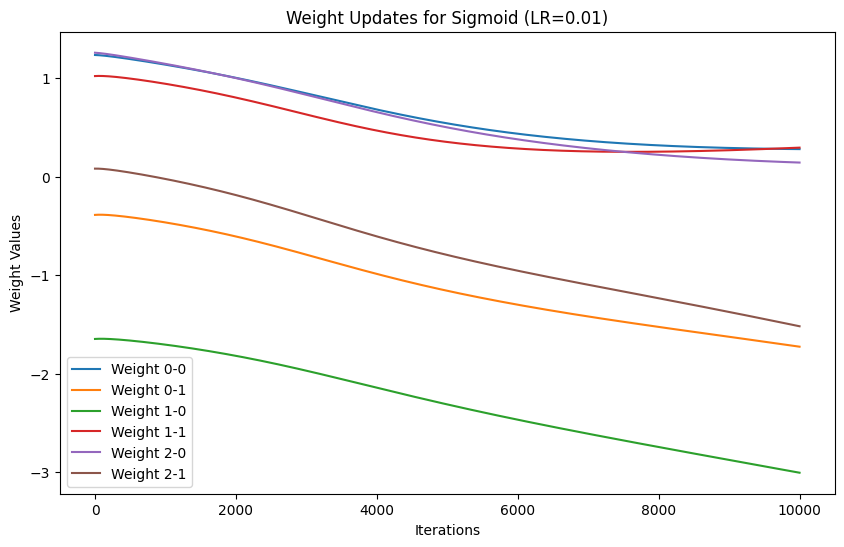

In [10]:
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([[0], [0], [0], [0], [0], [0], [0], [1]])

learning_rates = [0.01, 0.1, 0.5]

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    nn = NeuralNetwork(input_size=3, hidden_size=2, output_size=1, activation='sigmoid')
    iter_arr, err_arr, _ = nn.train(X, y, epochs=1000, learning_rate=lr)
    plt.plot(iter_arr, err_arr, label=f"Sigmoid LR={lr}")
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
plt.title('Error vs. Iterations for Sigmoid Activation')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    nn = NeuralNetwork(input_size=3, hidden_size=2, output_size=1, activation='relu')
    iter_arr, err_arr, _ = nn.train(X, y, epochs=10000, learning_rate=lr)
    plt.plot(iter_arr, err_arr, linestyle='dashed', label=f"ReLU LR={lr}")
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
plt.title('Error vs. Iterations for ReLU Activation')
plt.legend()
plt.show()

nn = NeuralNetwork(input_size=3, hidden_size=2, output_size=1, activation='sigmoid')
iter_arr, err_arr, weights_history = nn.train(X, y, epochs=10000, learning_rate=0.01)

plt.figure(figsize=(10, 6))
weights_history = np.array(weights_history)
for i in range(weights_history.shape[1]):
    for j in range(weights_history.shape[2]):
        plt.plot(iter_arr, weights_history[:, i, j], label=f'Weight {i}-{j}')
plt.xlabel('Iterations')
plt.ylabel('Weight Values')
plt.title('Weight Updates for Sigmoid (LR=0.01)')
plt.legend()
plt.show()

output = nn.feedforward(X)

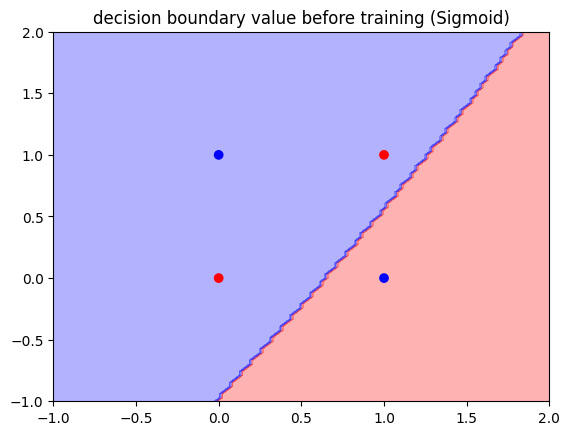

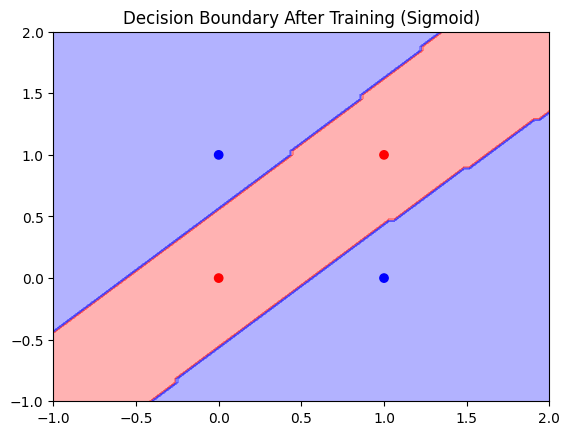

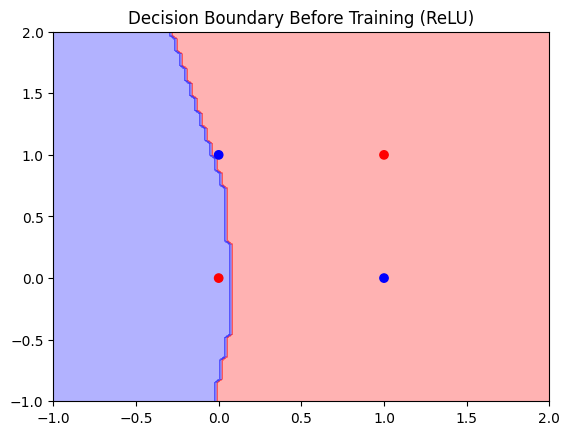

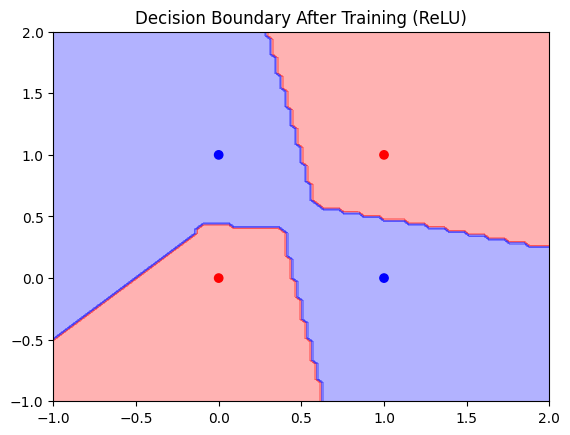

In [13]:
def plot_decision_boundary(nn, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
   
    Z = np.round(nn.feedforward(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)]))
    Z = Z.reshape(xx.shape)
   
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=ListedColormap(['red', 'blue']))
    plt.title(title)
    plt.show()

X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[0], [1], [1], [0]])
#or / xor

nn_relu = NeuralNetwork(input_size=3, hidden_size=4, output_size=1,  activation='relu')
nn_sigmoid = NeuralNetwork(input_size=3, hidden_size=4, output_size=1, activation='sigmoid')

plot_decision_boundary(nn_sigmoid, X, y, "decision boundary value before training (Sigmoid)")
nn_sigmoid.train(X, y, epochs=10000, )
plot_decision_boundary(nn_sigmoid, X, y, "Decision Boundary After Training (Sigmoid)")

plot_decision_boundary(nn_relu, X, y, "Decision Boundary Before Training (ReLU)")
nn_relu.train(X, y, epochs=10000)
plot_decision_boundary(nn_relu, X, y, "Decision Boundary After Training (ReLU)")